In [1]:
import numpy as np
import sklearn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])


In [2]:
np.random.seed(44)
wine_dataset = pd.read_csv("wine_dataset.csv")
print(wine_dataset.info())
wine_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
class                      5000 non-null int64
Alcohol                    5000 non-null float64
Malic_acid                 5000 non-null float64
Ash                        5000 non-null float64
Alcalinity_of_ash          5000 non-null float64
Magnesium                  5000 non-null float64
Total_phenols              5000 non-null float64
Flavanoids                 5000 non-null float64
Nonflavanoid_phenols       5000 non-null float64
Proanthocyanins            5000 non-null float64
Color_intensity            5000 non-null float64
Hue                        5000 non-null float64
Od_Hod_of_diluted_wines    5000 non-null float64
Proline                    5000 non-null float64
dtypes: float64(13), int64(1)
memory usage: 547.0 KB
None


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,2,11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,3,12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,1,13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,3,11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492


In [3]:
wine_dataset.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.966600,12.995186,2.330916,2.370151,19.496761,99.072699,2.300694,2.057249,0.362036,1.590397,5.086170,0.962753,2.609474,744.635286
std,0.772272,0.814378,1.118433,0.274757,3.351535,13.951364,0.617459,0.992019,0.124728,0.566114,2.337002,0.225385,0.704532,313.348736
min,1.000000,10.991005,0.478367,1.447951,10.366806,68.871553,0.969383,0.277914,0.109327,0.099295,1.129366,0.414259,1.112145,231.883252
25%,1.000000,12.386367,1.592804,2.236354,17.372474,88.827615,1.791985,1.223907,0.270011,1.238714,3.271563,0.802881,1.996074,507.083531
50%,2.000000,13.026910,1.867287,2.369439,19.383204,97.561288,2.324534,2.138558,0.335067,1.546307,4.745564,0.977078,2.770427,665.609642
75%,3.000000,13.624393,2.940638,2.542378,21.429700,105.978061,2.755317,2.808482,0.442366,1.888451,6.214175,1.104621,3.146930,948.204369
max,3.000000,14.802882,6.242546,3.167812,30.236014,164.765854,3.882879,4.397836,0.756410,3.700137,13.120260,1.603007,4.032795,1782.712893


In [4]:
# normalize features for better performance 
from sklearn import preprocessing
target = wine_dataset["class"]
x = wine_dataset.values # convert to numpy array
print(x.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled.shape)
wine_dataset = pd.DataFrame(x_scaled, columns=wine_dataset.columns)
wine_dataset["class"] = target
wine_dataset.head()

(5000, 14)
(5000, 14)


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,0.726791,0.085805,0.432125,0.200468,0.392663,0.452788,0.559874,0.477090,0.489749,0.163244,0.635628,0.584439,0.399009
1,2,0.237919,0.142156,0.437079,0.357903,0.368467,0.599717,0.382811,0.322602,0.258369,0.665030,0.790293,0.571170,0.065151
2,3,0.437744,0.220358,0.576004,0.564587,0.200303,0.326101,0.097921,0.662590,0.341220,0.640008,0.192992,0.156748,0.258989
3,1,0.541419,0.232330,0.259309,0.252821,0.414189,0.581132,0.615985,0.261494,0.381721,0.438447,0.341653,0.884296,0.417983
4,3,0.204211,0.440507,0.910246,0.337946,0.184095,0.430953,0.137943,0.273130,0.428986,0.771760,0.269215,0.559762,0.156864


In [5]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2, random_state=30)
for train_ind, test_ind in split.split(wine_dataset, wine_dataset["class"]):
    strat_train_set = wine_dataset.loc[train_ind]
    strat_test_set = wine_dataset.loc[test_ind]

In [6]:
train_set = strat_train_set
test_set = strat_test_set

In [7]:
# stratified sampling is not needed
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1725 to 3709
Data columns (total 14 columns):
class                      4000 non-null int64
Alcohol                    4000 non-null float64
Malic_acid                 4000 non-null float64
Ash                        4000 non-null float64
Alcalinity_of_ash          4000 non-null float64
Magnesium                  4000 non-null float64
Total_phenols              4000 non-null float64
Flavanoids                 4000 non-null float64
Nonflavanoid_phenols       4000 non-null float64
Proanthocyanins            4000 non-null float64
Color_intensity            4000 non-null float64
Hue                        4000 non-null float64
Od_Hod_of_diluted_wines    4000 non-null float64
Proline                    4000 non-null float64
dtypes: float64(13), int64(1)
memory usage: 468.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 387 to 4415
Data columns (total 14 columns):
class                      1000 non-null int

(None, None)

In [8]:
train_y = train_set[["class"]]
train_X = train_set.drop("class", axis=1)
test_y = test_set[["class"]]
test_X = test_set.drop("class", axis=1)

In [9]:
# simple svm classifier
from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(train_X, train_y.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
# simple svm classifier result
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
wine_train_predictions = svm_classifier.predict(train_X)
accuracy = accuracy_score(train_y, wine_train_predictions)
print(accuracy)
print(classification_report(train_y, wine_train_predictions))
print(f1_score(train_y, wine_train_predictions, average='weighted'))

0.9245
              precision    recall  f1-score   support

           1       0.93      0.93      0.93      1262
           2       0.92      0.93      0.92      1610
           3       0.93      0.92      0.92      1128

    accuracy                           0.92      4000
   macro avg       0.93      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

0.9244968834370614


In [11]:
# simple cross val scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_classifier, train_X, train_y.values.ravel(),
                         scoring="f1_weighted", cv=10)
scores.mean()

0.921415798687868

In [12]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X.iloc[train_index]
            train_y_folds = train_y.iloc[train_index]
            test_X_fold = train_X.iloc[test_index]
            test_y_fold = train_y.iloc[test_index]
            classifier.fit(train_X_folds.values, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [13]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.xlabel('Number of Training Instances Used')
    
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [14]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [15]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [16]:
svm_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

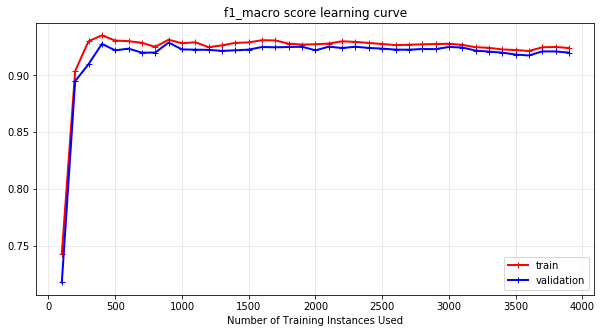

In [17]:
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, svm_classifier, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_macro score learning curve")

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.38461538461538464,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 0.9261663092512583


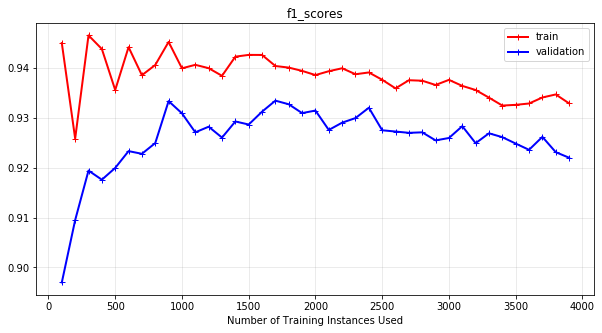

In [18]:
# check it with roc_curve
size = train_X.shape[1]
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C' : [0.5, 1.0, 2.0],
    'degree': [2, 3, 4, 5],
    'gamma': [1/size,2/size,5/size]
}

svm_classifier = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)

search_f1 = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='f1_weighted', 
                         n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())
print(search_f1.best_estimator_, search_f1.best_score_)
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score,
                           average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_scores")

SVC(C=3.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 0.9302046051104306


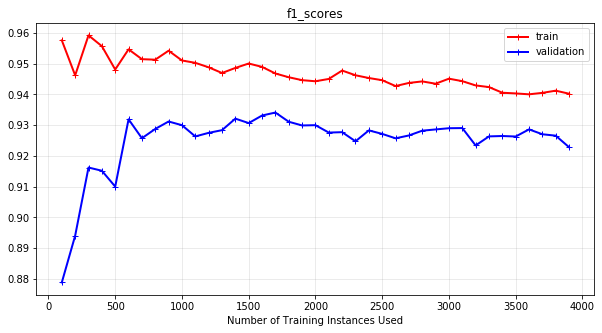

In [19]:
# check it with roc_curve
size = train_X.shape[1]
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [1.5, 2.0, 2.5, 3.5, 5, 7.5],
    'gamma': [3/size,5/size,7/size,10/size]
}

svm_classifier = SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.38461538461538464,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

search_f1 = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='f1_weighted', 
                         n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())
print(search_f1.best_estimator_, search_f1.best_score_)
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score,
                           average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_scores")

SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 0.9304527698968761


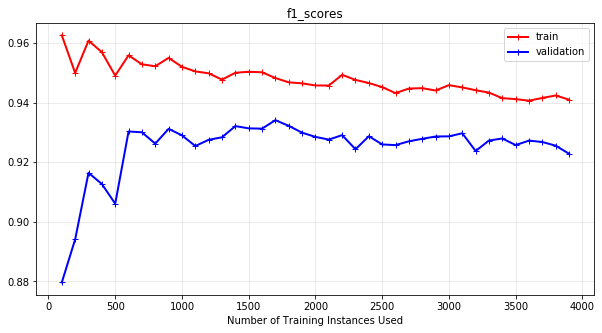

In [20]:
# check it with roc_curve
size = train_X.shape[1]
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [3.0, 3.5, 4.0, 4.5, 5.0],
    'gamma': [6/size,7/size,8/size,9/size]
}

svm_classifier = SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.38461538461538464,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

search_f1 = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='f1_weighted', 
                         n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())
print(search_f1.best_estimator_, search_f1.best_score_)
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score,
                           average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_scores")

SVC(C=6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 0.9286605875328974


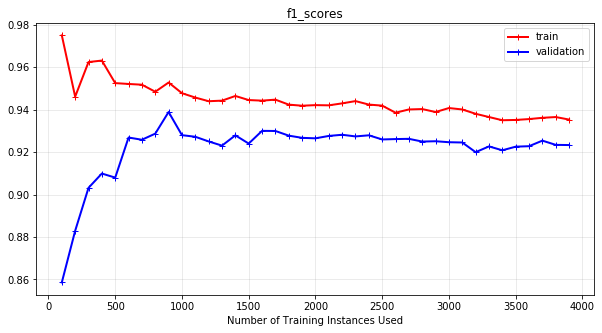

In [21]:
# check it with roc_curve
size = train_X.shape[1]
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'sigmoid'],
    'C' : [2,3,4,5,6],
    'degree': [2, 3, 4, 5],
    'gamma': [1/size,2/size,5/size,7/size]
}

svm_classifier = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)

search_f1 = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='f1_weighted', 
                         n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())
print(search_f1.best_estimator_, search_f1.best_score_)
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score,
                           average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_scores")

SVC(C=6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 0.9286605875328974


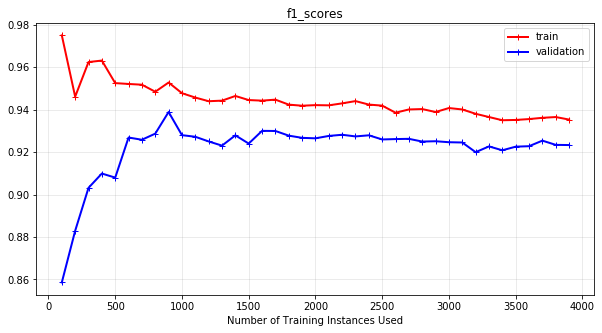

In [22]:
# check it with roc_curve
size = train_X.shape[1]
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [6, 7, 9, 12],
    'degree': [2, 3, 4],
    'gamma': [6/size,7/size,8/size,10/size]
}

svm_classifier = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)

search_f1 = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='f1_weighted', 
                         n_jobs=-2)
search_f1.fit(train_X, train_y.values.ravel())
print(search_f1.best_estimator_, search_f1.best_score_)
from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score,
                           average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_scores")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.9s finished


[0.92433333 0.93661111 0.94416667 0.95333333 0.96375   ] [0.92075 0.92875 0.9245  0.9225  0.916  ] [1, 2, 3, 4, 5]


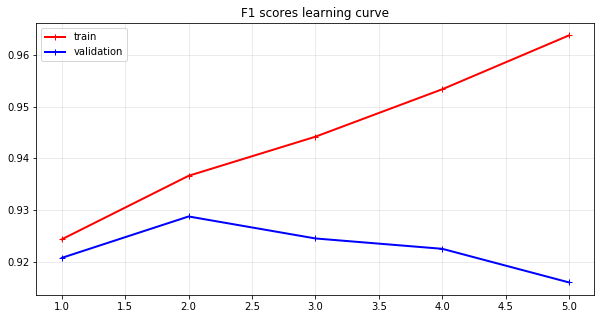

In [23]:
from sklearn.model_selection import validation_curve

svm_classifier_poly = SVC(C=6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
                    kernel='poly', max_iter=-1, probability=False, random_state=None,
                    shrinking=True, tol=0.001, verbose=False)

param_range = [1, 2, 3, 4, 5]

train_scores, test_scores = validation_curve(
    svm_classifier_poly, train_X, train_y.values.ravel(), param_name="degree", 
    param_range=param_range, scoring='accuracy', verbose=1, cv=10, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='F1 scores learning curve', inverse_x=False)

In [24]:
best_rbf_svm = SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
best_poly_svm = SVC(C=6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=2, gamma=0.5384615384615384,
                    kernel='poly', max_iter=-1, probability=False, random_state=None,
                    shrinking=True, tol=0.001, verbose=False)

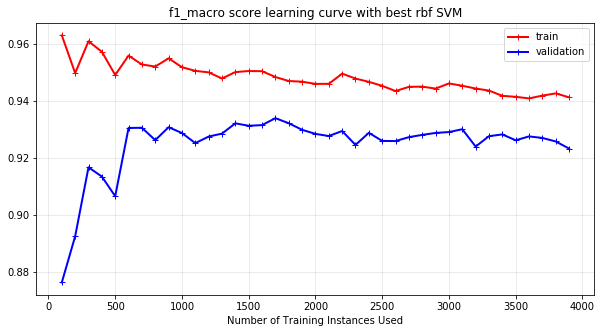

In [25]:
f1_scores = stratFold(train_X, train_y, best_rbf_svm, f1_score, 
                      average='macro')
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_macro score learning curve with best rbf SVM")

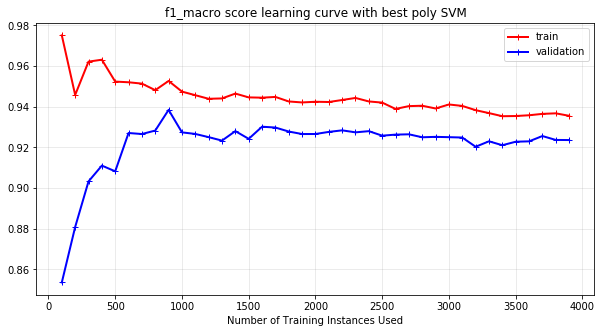

In [26]:
f1_scores = stratFold(train_X, train_y, best_poly_svm, f1_score, 
                      average='macro')
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_macro score learning curve with best poly SVM")

In [27]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix

best_rbf_svm.fit(train_X, train_y.values.ravel())
test_predictions = best_rbf_svm.predict(test_X)
print(classification_report(test_y, test_predictions, digits=5))
print(confusion_matrix(test_y, test_predictions))


              precision    recall  f1-score   support

           1    0.92260   0.94603   0.93417       315
           2    0.94472   0.93300   0.93883       403
           3    0.93190   0.92199   0.92692       282

    accuracy                        0.93400      1000
   macro avg    0.93307   0.93367   0.93330      1000
weighted avg    0.93414   0.93400   0.93400      1000

[[298  10   7]
 [ 15 376  12]
 [ 10  12 260]]


In [29]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix

best_poly_svm.fit(train_X, train_y.values.ravel())
test_predictions = best_poly_svm.predict(test_X)
print(classification_report(test_y, test_predictions, digits=5))
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

           1    0.91950   0.94286   0.93103       315
           2    0.94015   0.93548   0.93781       403
           3    0.93841   0.91844   0.92832       282

    accuracy                        0.93300      1000
   macro avg    0.93269   0.93226   0.93239      1000
weighted avg    0.93315   0.93300   0.93300      1000

[[297  11   7]
 [ 16 377  10]
 [ 10  13 259]]
